# **STAGE PONTS INSTRUMENTES - Notebook 10**

## Table of Contents

### 0. [Bibliothèques](#0/-Bibliothèques)
### I. [Visualisation des signaux pour tous les capteurs](#I/-Visualisation-des-signaux-pour-tous-les-capteurs)
### II. [Visualisation des pics](#II/-Visualisation-des-pics)

### III. [Calcul de la LI sur tous les capteurs](#III/-Calcul-de-la-LI-sur-tous-les-capteurs)
### IV. [Calcul de la LI moyenne entre deux capteurs sur le capteur 4](#IV/-Calcul-de-la-LI-moyenne-entre-deux-capteurs-sur-le-capteur-4)
1. [Calibration sur les signaux du capteur 4](#IV.1-Calibration-sur-les-signaux-du-capteur-4)
2. [Calibration sur les signaux des capteurs 4 et 6](#IV.2-Calibration-sur-les-signaux-des-capteurs-4-et-6)
3. [Calibration sur les signaux des capteurs 3 et 4](#IV.3-Calibration-sur-les-signaux-des-capteurs-3-et-4)


**Dans ce Notebook nous allons voir si le problème d'amplitude des LI peut être réglé en calculant une LI moyenne qui serait situé entre deux capteurs**

## 0/ Bibliothèques

In [1]:
from Bwifsttar import load_senlis_modified,calibration_mt_reg,eval_LI_mt
import matplotlib.pyplot as plt
import numpy as np

## I/ Visualisation des signaux pour tous les capteurs

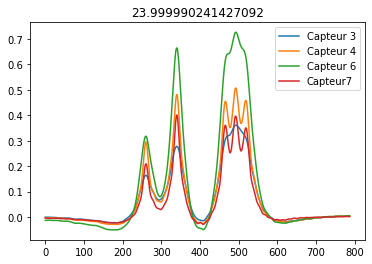

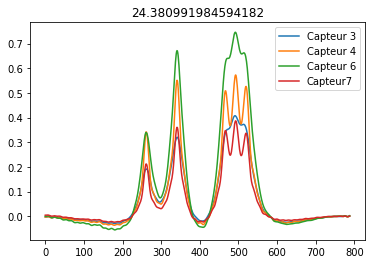

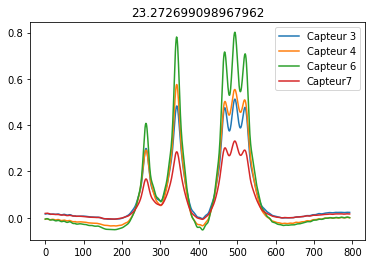

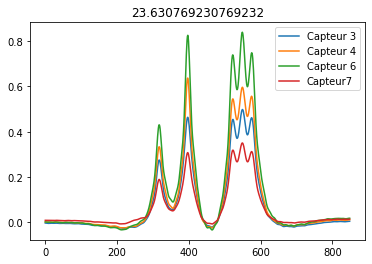

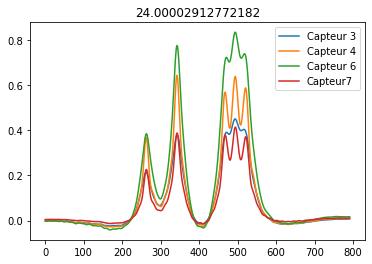

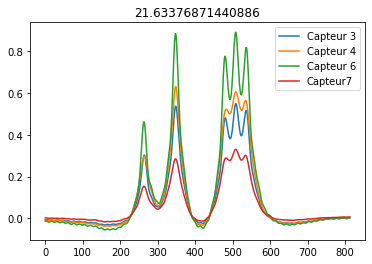

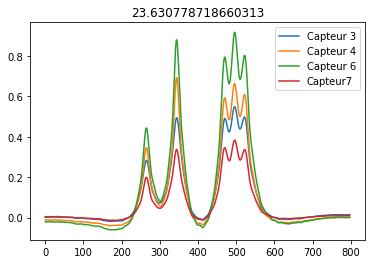

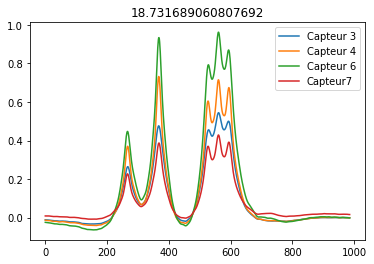

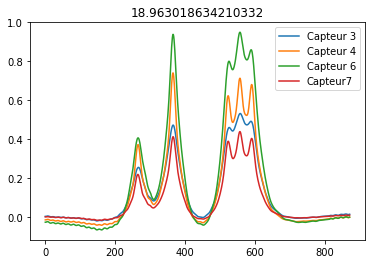

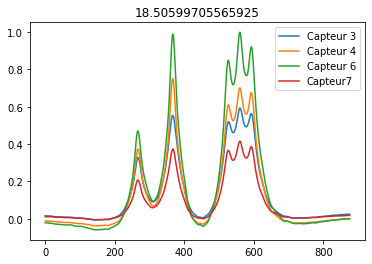

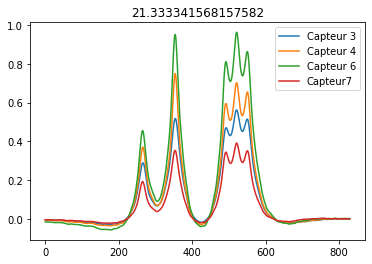

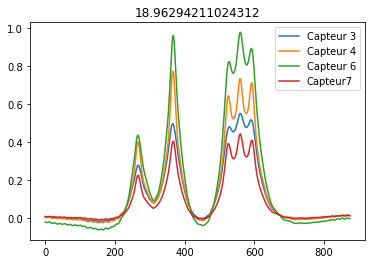

In [2]:
for i in range(0,12):

    calibration_trucks3,_ = load_senlis_modified(selected=3) #[3,4,6,7]
    truck3 = calibration_trucks3[i]
    calibration_trucks4,_ = load_senlis_modified(selected=4) #[3,4,6,7]
    truck4 = calibration_trucks4[i]
    calibration_trucks6,_ = load_senlis_modified(selected=6) #[3,4,6,7]
    truck6 = calibration_trucks6[i]
    calibration_trucks7,_ = load_senlis_modified(selected=7) #[3,4,6,7]
    truck7 = calibration_trucks7[i]
    c3 = plt.plot(truck3.signals,label='Capteur 3')#bleu
    plt.title(str(truck3.speed))
    
    c4 = plt.plot(truck4.signals,label='Capteur 4')#jaune
    c6 = plt.plot(truck6.signals,label='Capteur 6')#vert
    c7 = plt.plot(truck7.signals,label= 'Capteur7')#rouge
    plt.legend()

    plt.show()
    #il faut garder les capteurs 6 et 4 ce qui correspond aux meilleurs résultats sur les évaluations précédentes

## II/ Visualisation des pics

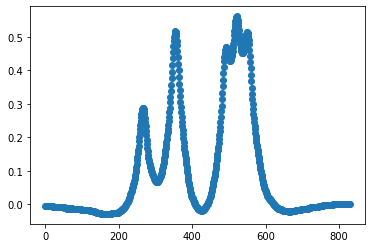

In [3]:
truck_test = calibration_trucks3[10]
plt.plot(truck_test.signals,'o')

## III/ Calcul de la LI sur tous les capteurs

In [4]:
calibration_trucks3,traffic_trucks3 = load_senlis_modified(selected=3) #[3,4,6,7]
calibration_trucks4,traffic_trucks4 = load_senlis_modified(selected=4) #[3,4,6,7]
calibration_trucks6,traffic_trucks6 = load_senlis_modified(selected=6)
calibration_trucks7,traffic_trucks7 = load_senlis_modified(selected=7)


In [5]:
calibration_tot = []
for i,truck in enumerate(calibration_trucks4):
    calibration_tot.append(calibration_trucks4[i])
    calibration_tot.append(calibration_trucks6[i])
    calibration_tot.append(calibration_trucks3[i])
    calibration_tot.append(calibration_trucks7[i])
    
traffic_tot = []
for i,truck in enumerate(traffic_trucks4):
    traffic_tot.append(traffic_trucks4[i])
    traffic_tot.append(traffic_trucks6[i])
    traffic_tot.append(traffic_trucks3[i])
    traffic_tot.append(traffic_trucks7[i])



In [6]:
inf_tv_reg = calibration_mt_reg(calibration_tot,tv_reg={'strength': 1e2, 'cutoff': 0.95})

In [7]:
inf = np.array([inf_tv_reg])
print("Distance euclidienne moyenne calibration : ",eval_LI_mt(calibration_tot,inf[0]))
print("Distance euclidienne moyenne traffic : ",eval_LI_mt(traffic_tot,inf[0]))

Distance euclidienne moyenne calibration :  2.1226039678032005
Distance euclidienne moyenne traffic :  1.704335368732427


**Les résultats sont mauvais**

## IV/ Calcul de la LI moyenne entre deux capteurs sur le capteur 4

### IV.1 Calibration sur les signaux du capteur 4

In [8]:
inf_tv_reg = calibration_mt_reg(calibration_trucks4,tv_reg={'strength': 1e2, 'cutoff': 0.95})
inf = np.array([inf_tv_reg])


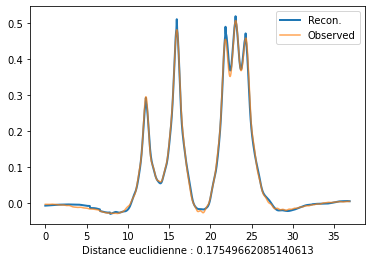

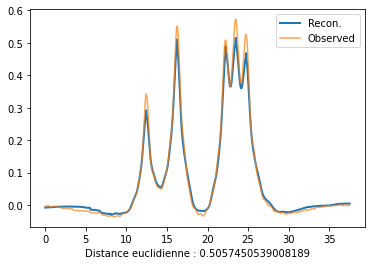

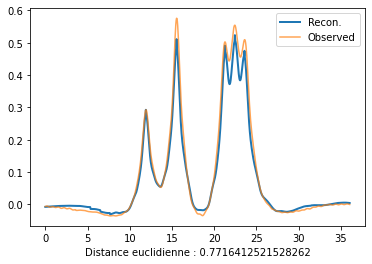

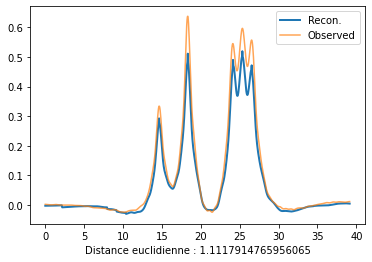

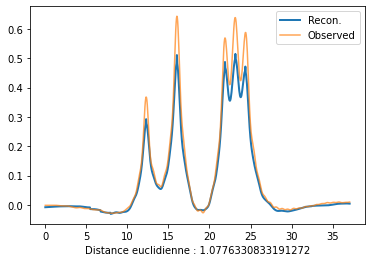

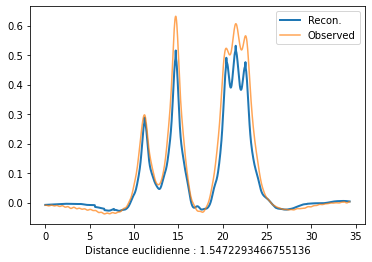

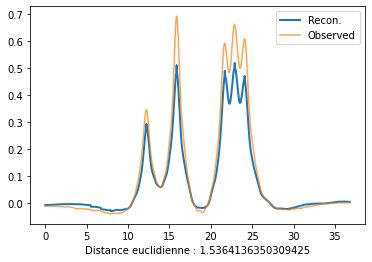

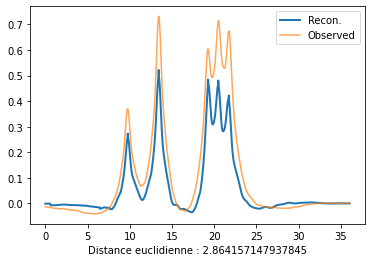

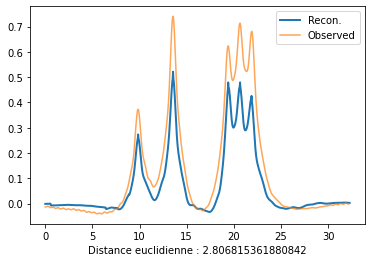

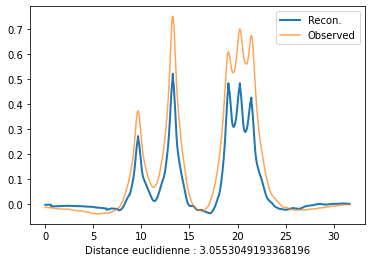

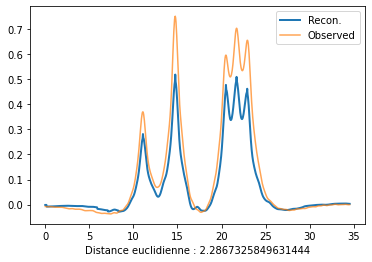

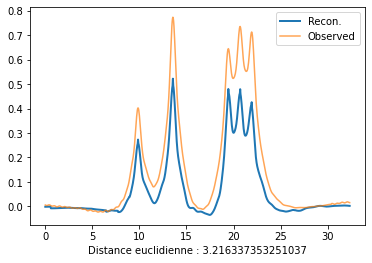

Distance euclidienne moyenne calibration :  1.7462748196579942


In [9]:
#SCORE SUR LES RECONSTRUCTIONS DES SIGNAUX
print("Distance euclidienne moyenne calibration : ",eval_LI_mt(calibration_trucks4,inf[0],plot=True))


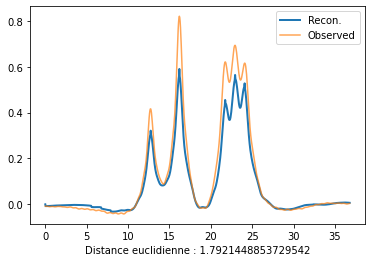

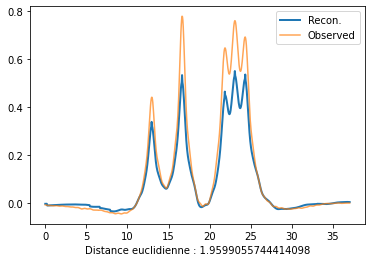

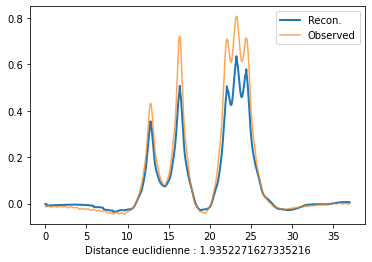

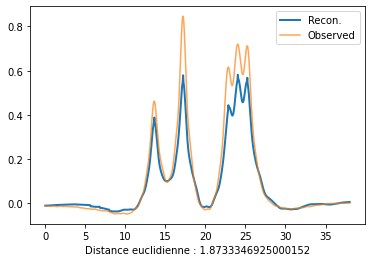

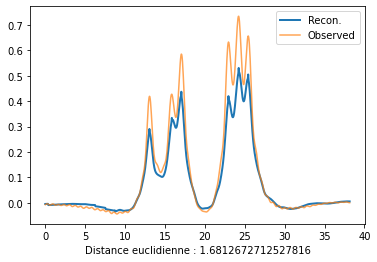

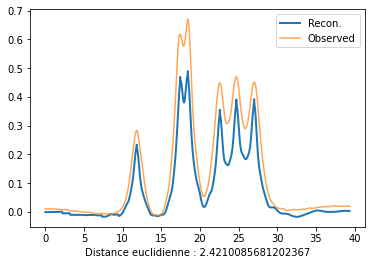

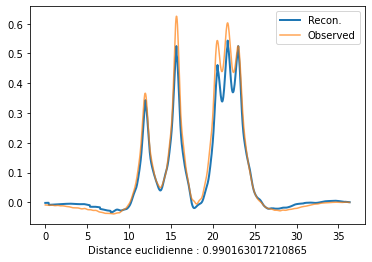

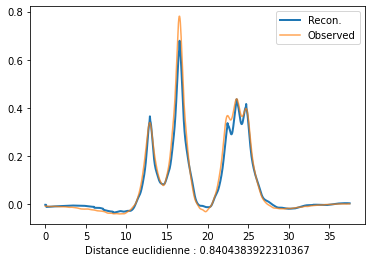

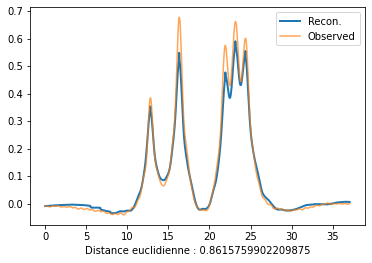

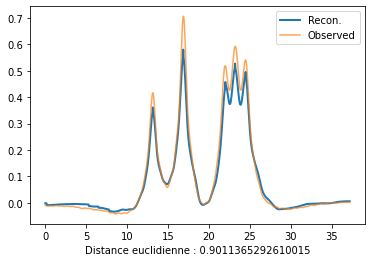

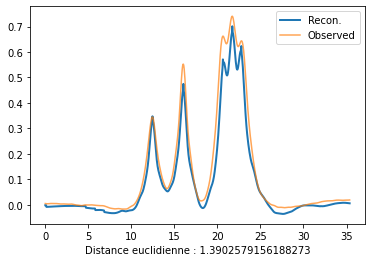

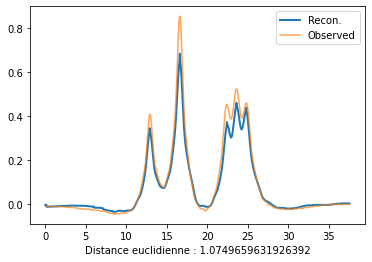

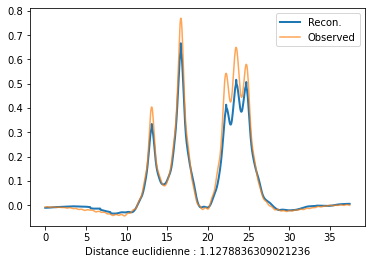

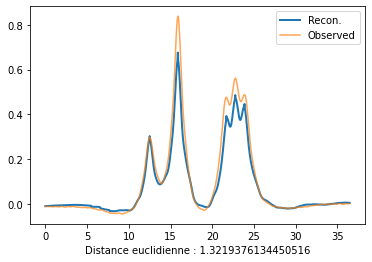

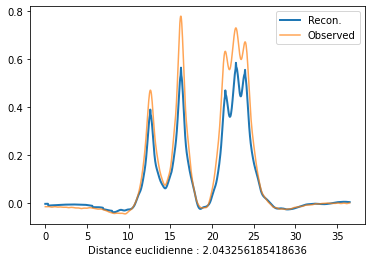

Distance euclidienne moyenne traffic :  1.4809668927948059


In [10]:
print("Distance euclidienne moyenne traffic : ",eval_LI_mt(traffic_trucks4,inf[0],plot=True))

### IV.2 Calibration sur les signaux des capteurs 4 et 6

In [11]:
calib = []
traffic = []
for j,truck in enumerate(calibration_trucks4):
    calib.append(calibration_trucks4[j])
    calib.append(calibration_trucks6[j])
    traffic.append(traffic_trucks4[j])
    traffic.append(traffic_trucks6[j])
    #trucks.append(calibration_trucks3[j])
    #trucks.append(calibration_trucks7[j])

inf_tv_reg = calibration_mt_reg(calib,tv_reg={'strength': 1e2, 'cutoff': 0.95})
inf = np.array([inf_tv_reg])


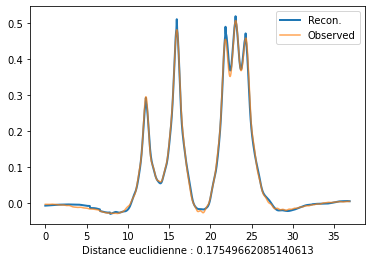

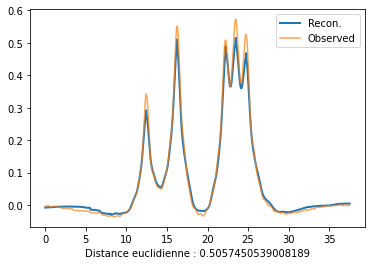

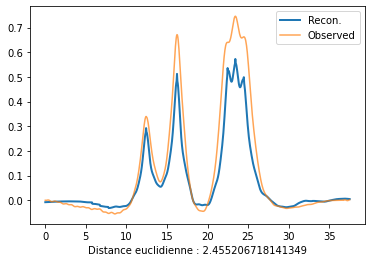

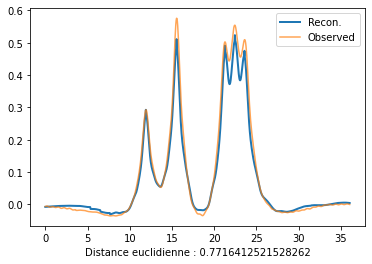

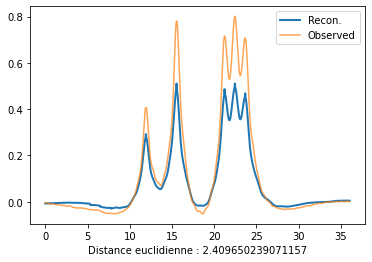

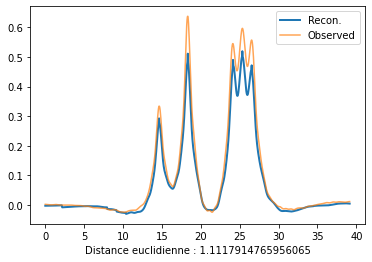

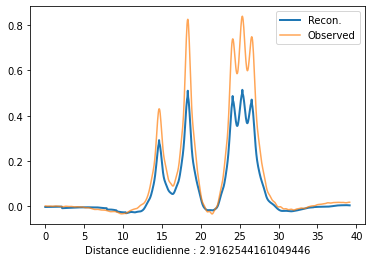

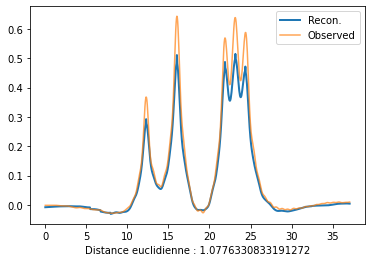

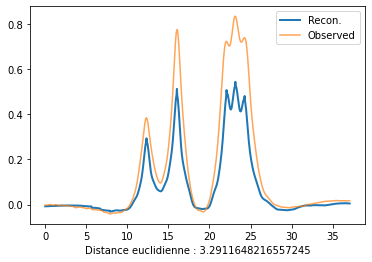

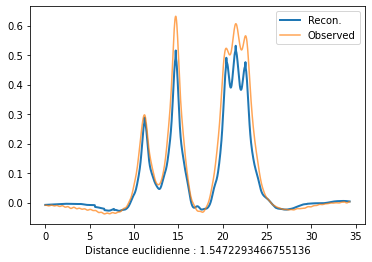

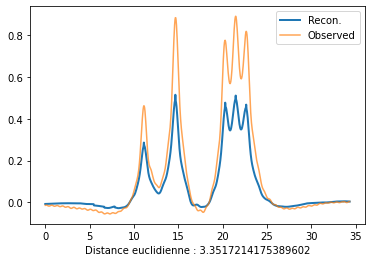

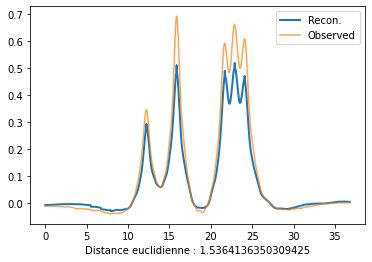

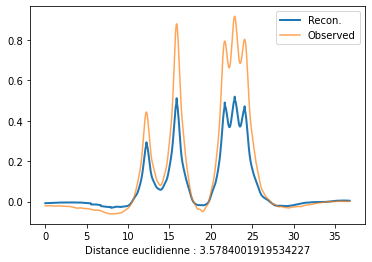

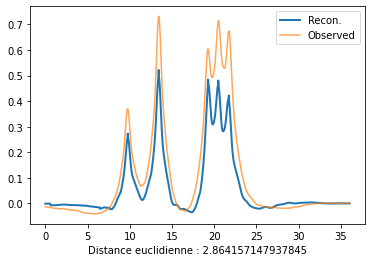

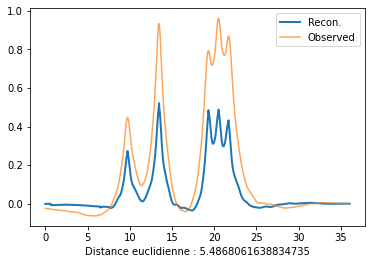

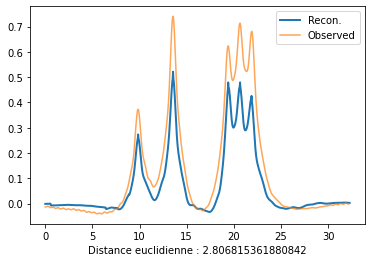

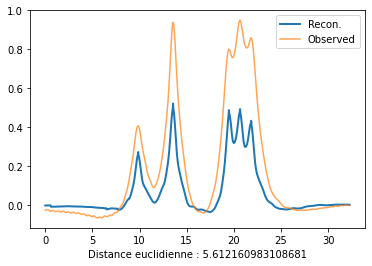

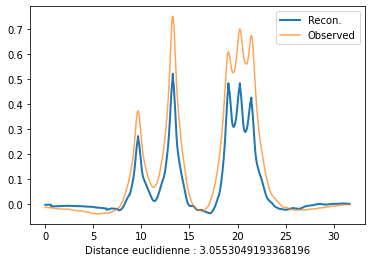

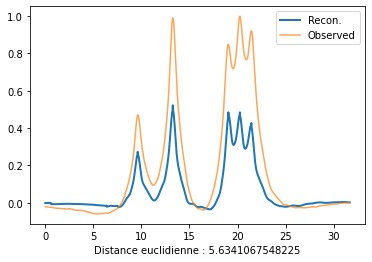

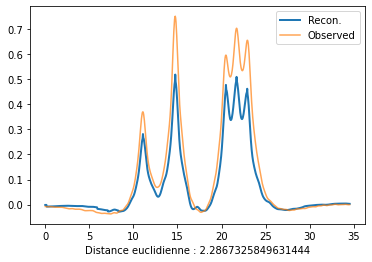

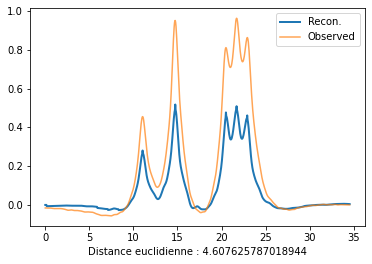

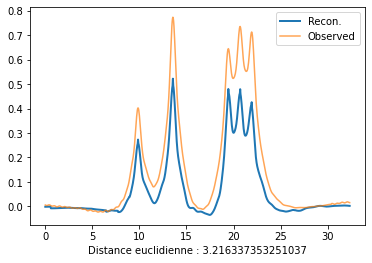

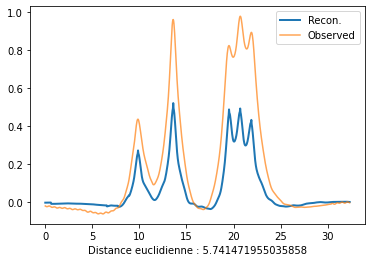

Distance euclidienne moyenne tous camions :  2.8712985775752586


In [12]:
print("Distance euclidienne moyenne tous camions : ",eval_LI_mt(calib,inf[0],plot=True))

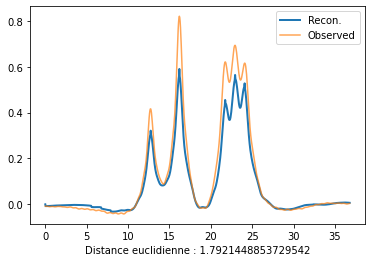

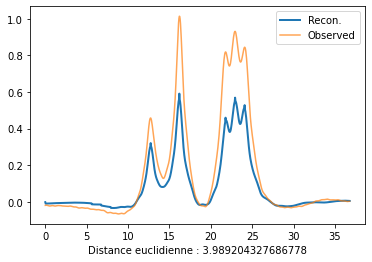

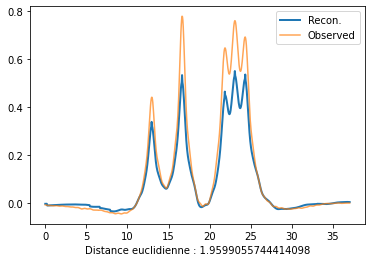

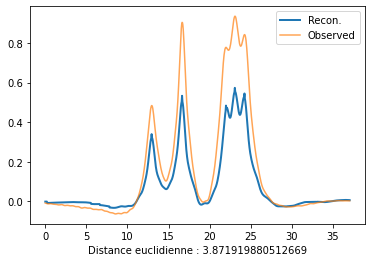

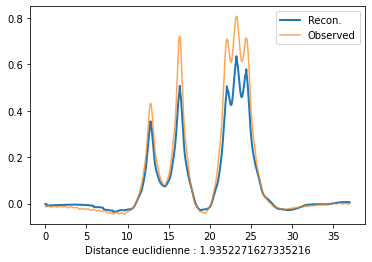

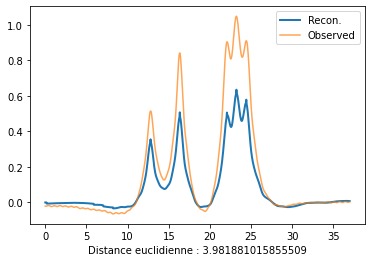

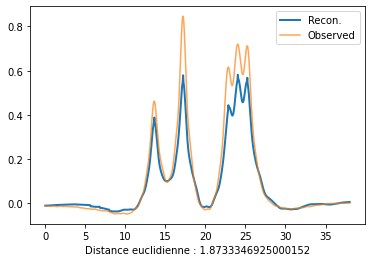

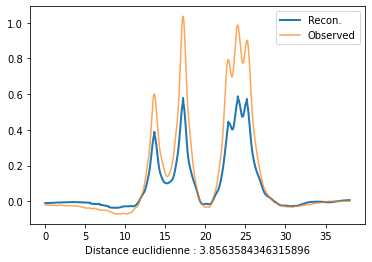

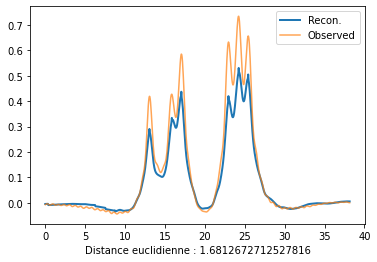

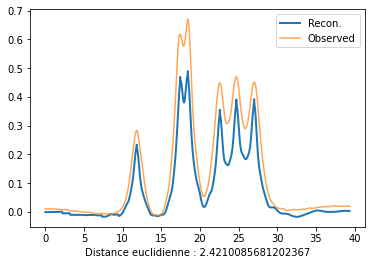

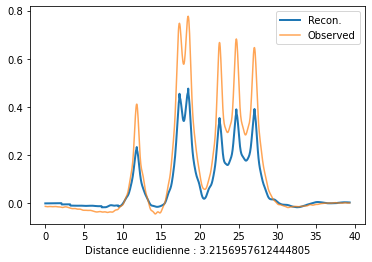

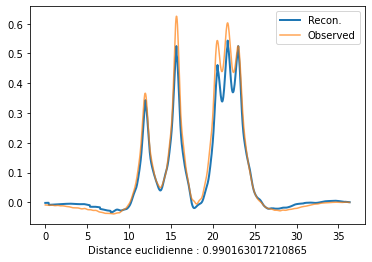

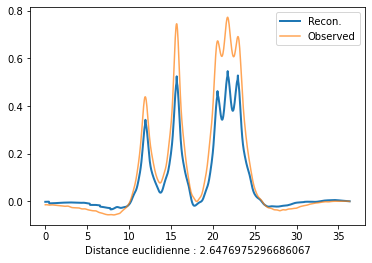

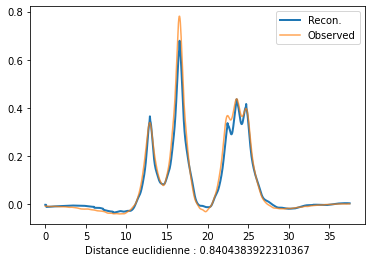

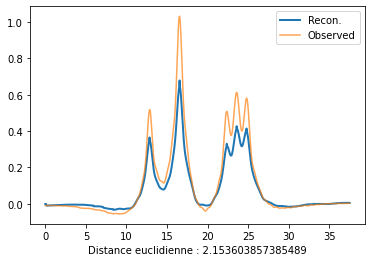

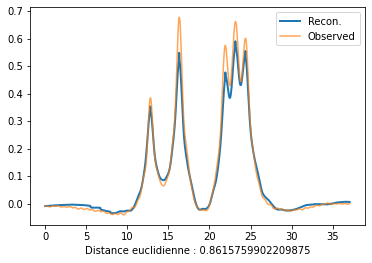

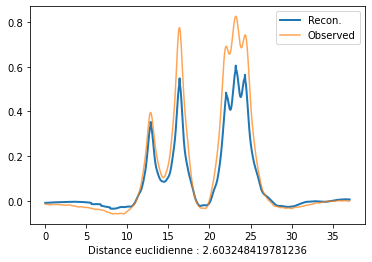

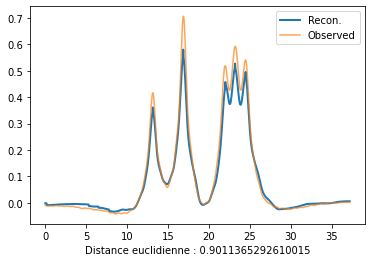

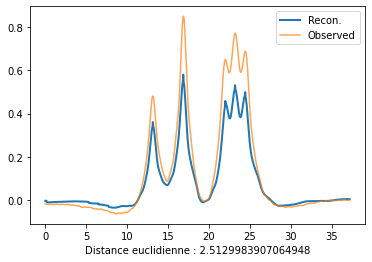

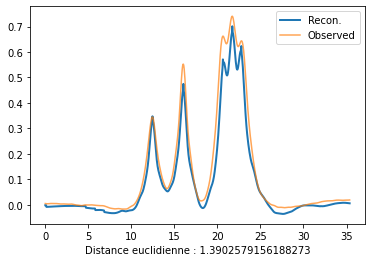

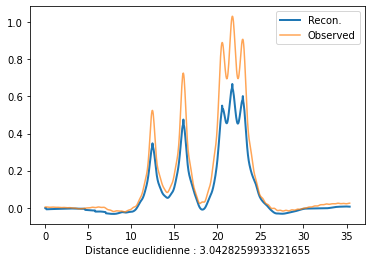

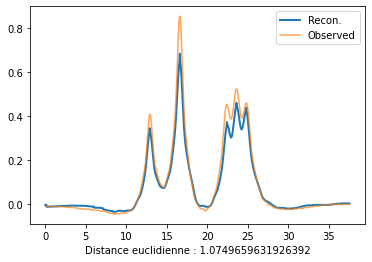

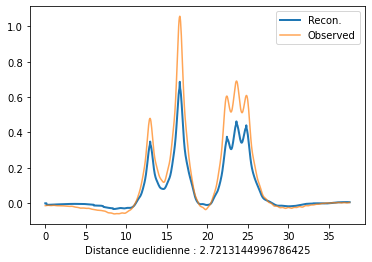

Distance euclidienne moyenne calibration :  2.2747032205495623


In [13]:
print("Distance euclidienne moyenne calibration : ",eval_LI_mt(traffic,inf[0],plot=True))

**Les résultats sont légérement améliorés sur les données de traffic. Cependant cela pourrait être dû au fait qu'il y ait plus de données de calibration.. La différence n'est pas nette**

### IV.3 Calibration sur les signaux des capteurs 3 et 4

In [14]:
calib = []
traffic = []
for j,truck in enumerate(calibration_trucks4):
    calib.append(calibration_trucks4[j])
    calib.append(calibration_trucks3[j])
    traffic.append(traffic_trucks4[j])
    traffic.append(traffic_trucks3[j])
    #trucks.append(calibration_trucks3[j])
    #trucks.append(calibration_trucks7[j])

inf_tv_reg = calibration_mt_reg(calib,tv_reg={'strength': 1e2, 'cutoff': 0.95})
inf = np.array([inf_tv_reg])


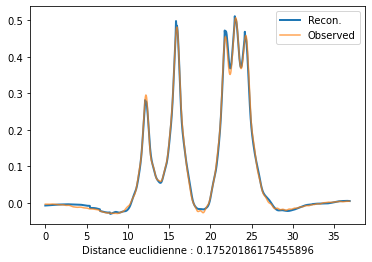

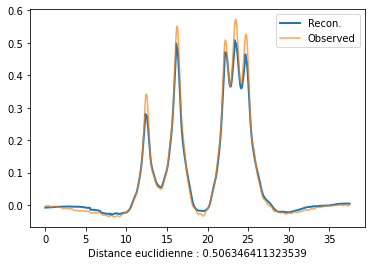

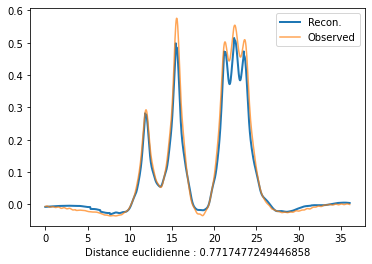

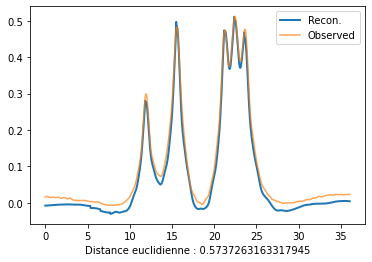

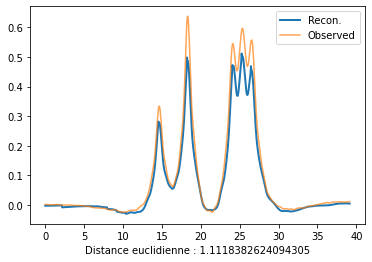

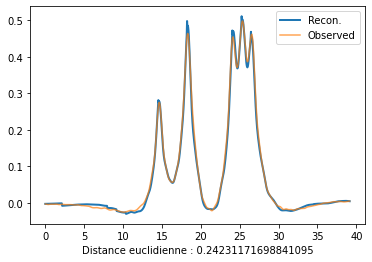

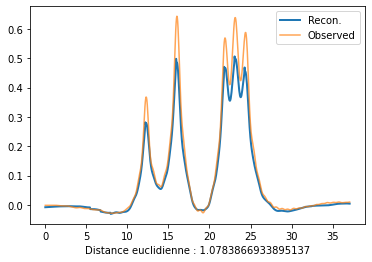

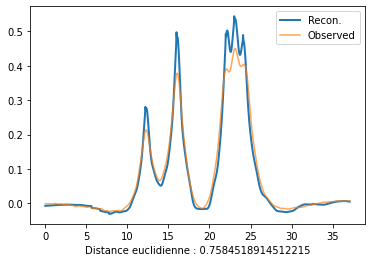

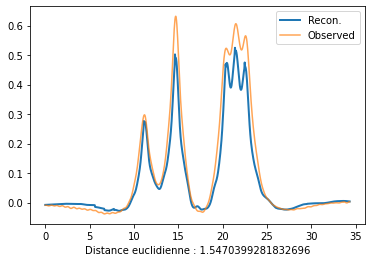

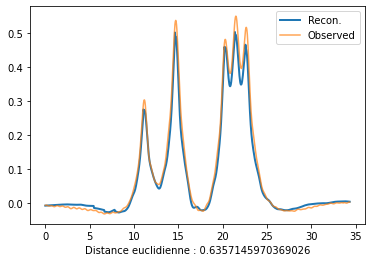

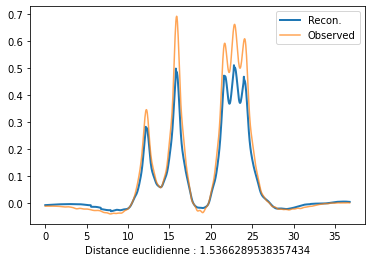

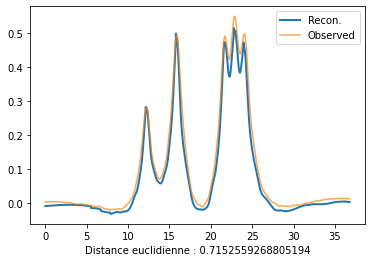

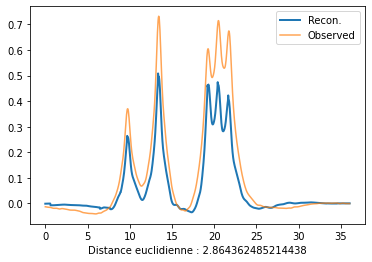

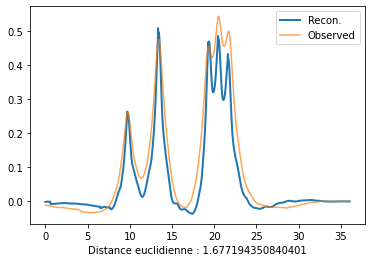

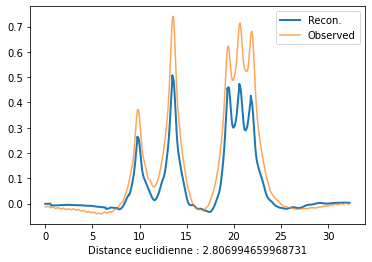

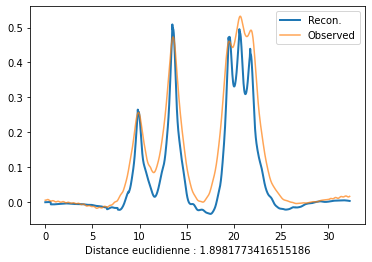

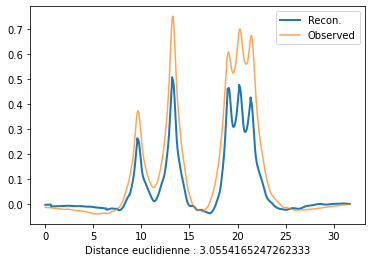

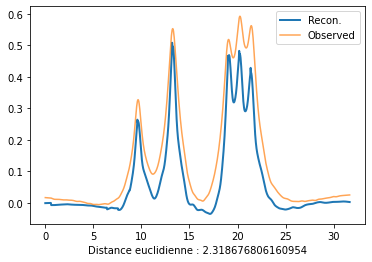

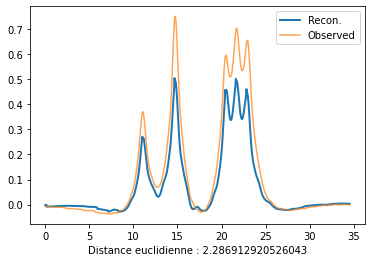

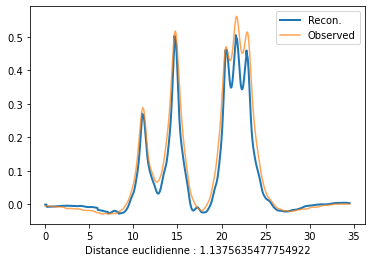

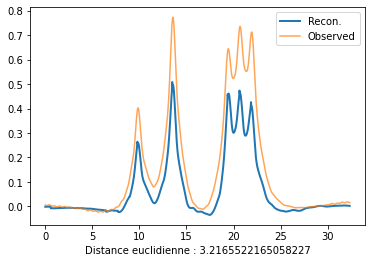

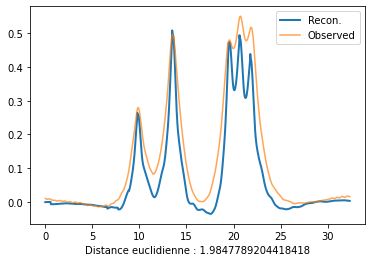

Distance euclidienne moyenne tous camions :  1.4954218208336847


In [15]:
print("Distance euclidienne moyenne tous camions : ",eval_LI_mt(calib,inf[0],plot=True))

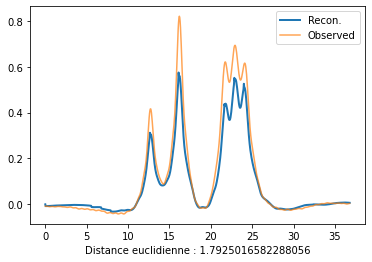

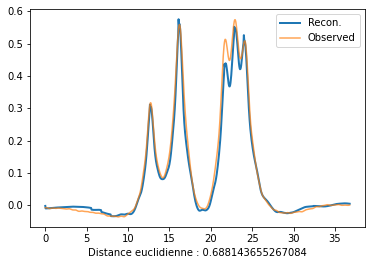

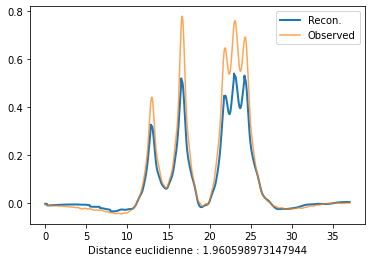

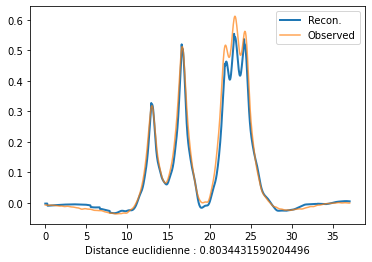

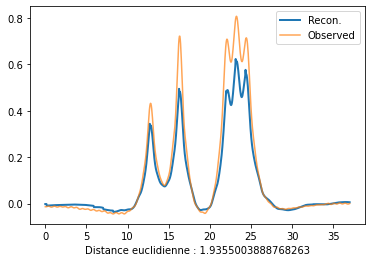

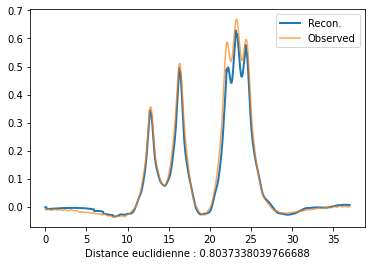

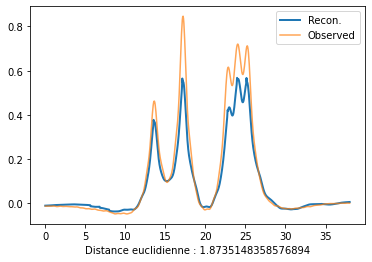

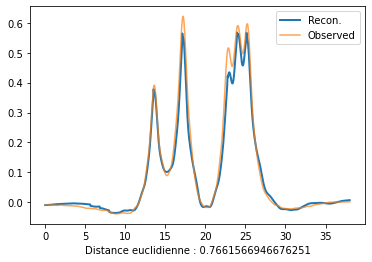

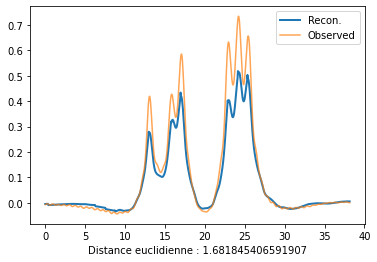

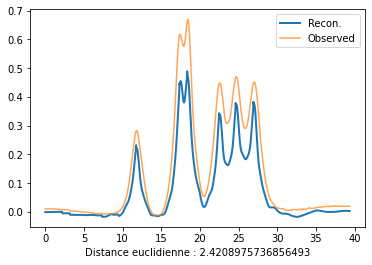

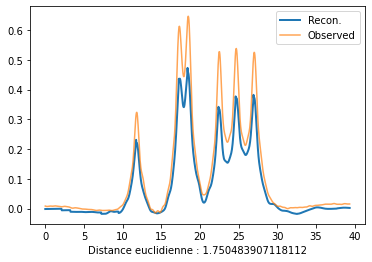

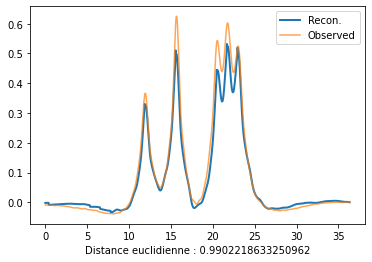

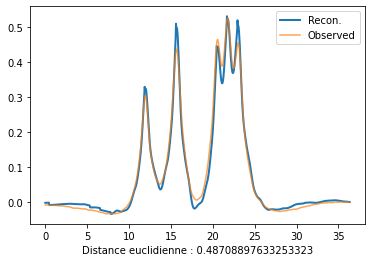

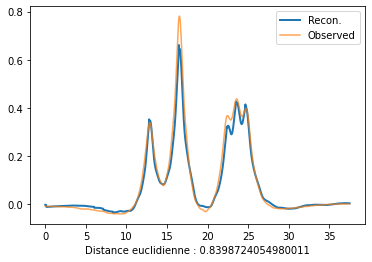

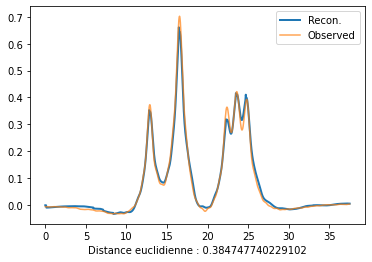

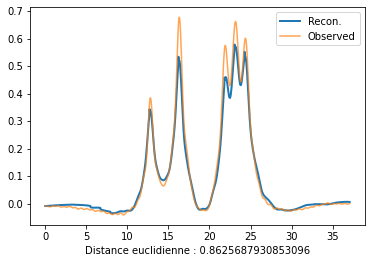

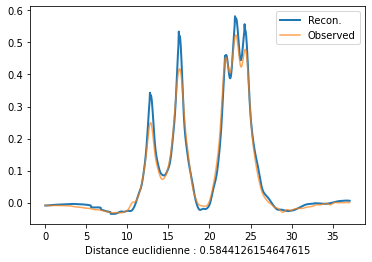

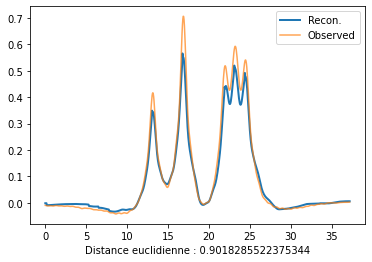

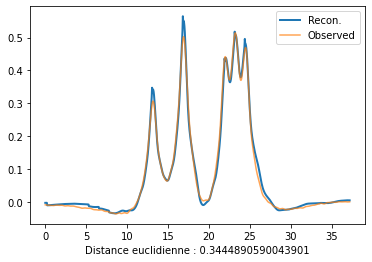

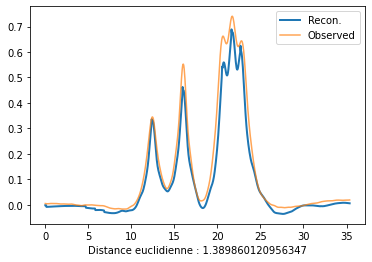

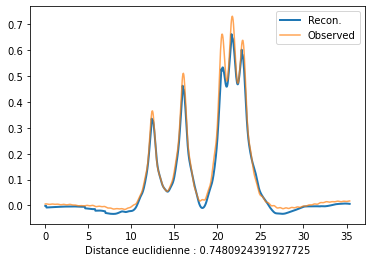

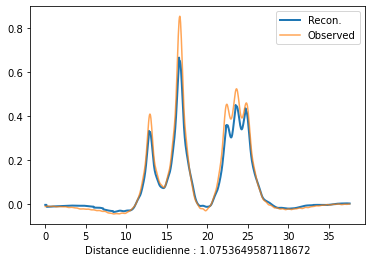

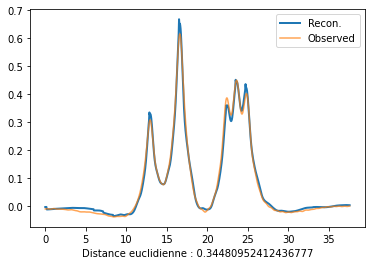

Distance euclidienne moyenne calibration :  1.10565987411308


In [16]:
print("Distance euclidienne moyenne calibration : ",eval_LI_mt(traffic,inf[0],plot=True))

**Nous pouvons finalement constaté que les légères améliorations de performances ne sont pas suffisantes pour montrer qu'utiliser une LI moyenne compense le problème d'amplitude**